## Fix `feature_selection` plots

In [14]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

In [15]:
# models=['EIF+']
# interpretations=['RandomForest']
# scenarios=[1,2]
models=['EIF+']
interpretations=['EXIFFI']
scenarios=[1,2]
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('ionosphere', path = data_real_path)

Let's put us in scenario 2

In [3]:
dataset.drop_duplicates()
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0)
dataset.pre_process()

In [4]:
I=ExtendedIsolationForest(plus=True,n_estimators=100,max_depth='auto',max_samples='auto')

Let's compute the random feature selection and save it in a file

In [7]:
imp_path=os.path.join(experiment_path,dataset.name,'experiments','global_importances','EIF+','EXIFFI',f'scenario_{str(2)}')
imp=open_element(get_most_recent_file(imp_path),filetype="npz")
feat_order=np.argsort(imp.mean(axis=0))
Precisions_random = namedtuple("Precisions_random",["random","dataset","model"])
random = feature_selection(I, dataset, feat_order, 10, inverse=True, random=True)
data_random = Precisions_random(random, dataset.name, 'EIF+')
path_rand_prec = os.path.join(experiment_path,dataset.name,'experiments','feature_selection','EIF+','EXIFFI','random')
if not os.path.exists(path_rand_prec):
    os.makedirs(path_rand_prec)
save_fs_prec_random(data_random, path_rand_prec)

100%|██████████| 13/13 [00:12<00:00,  1.03it/s]


In [17]:
def fix_feat_sel_plot(dataset,model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,box_loc=None,rotation=False,plot_image=True,random=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    path_random=os.path.join(experiment_path,dataset.name,'experiments','feature_selection',model,'random')
    file_path_random=get_most_recent_file(path_random)
    if random:
        plot_feature_selection(file_path,plot_path=plot_path,precision_file_random=file_path_random,model=model,interpretation=interpretation,scenario=scenario,save_image=save,plot_image=plot_image,rotation=rotation)
    else:
        plot_feature_selection(file_path,plot_path=plot_path,model=model,interpretation=interpretation,scenario=scenario,save_image=save,plot_image=plot_image,rotation=rotation)

In [32]:
os.chdir(experiment_path)
fs_plot_path=os.path.join(experiment_path,dataset.name,'plots_new/fs_plots')
if not os.path.exists(fs_plot_path):
    os.makedirs(fs_plot_path)
for model in models:
    for interpretation in interpretations:
        if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
            continue
        elif (model=='IF') and (interpretation=='EXIFFI'):
            continue
        elif model=='EIF+' and interpretation=='RandomForest':
            continue
        else:
            for scenario in scenarios:
                if scenario==1:
                    continue
                else:
                    fix_feat_sel_plot(dataset,model,interpretation,scenario,plot_path=fs_plot_path,save=True,plot_image=False)
                    plt.close()

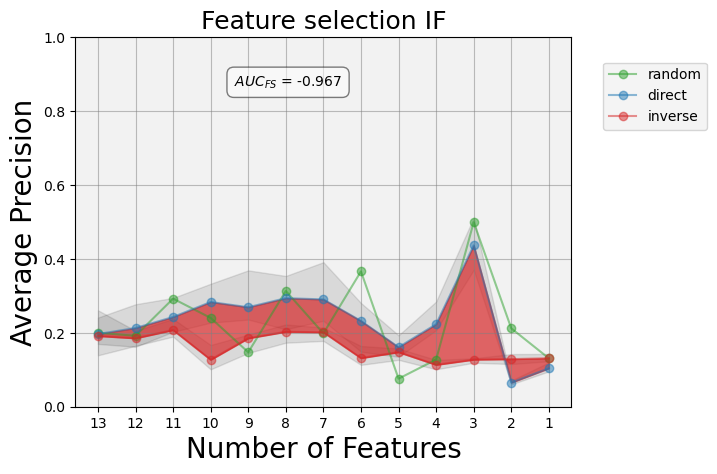

In [9]:
#fs_plot_path=os.path.join(experiment_path,dataset.name,'plots_new/fs_plots')
fix_feat_sel_plot(dataset,'IF','DIFFI',2,save=True,plot_image=True)

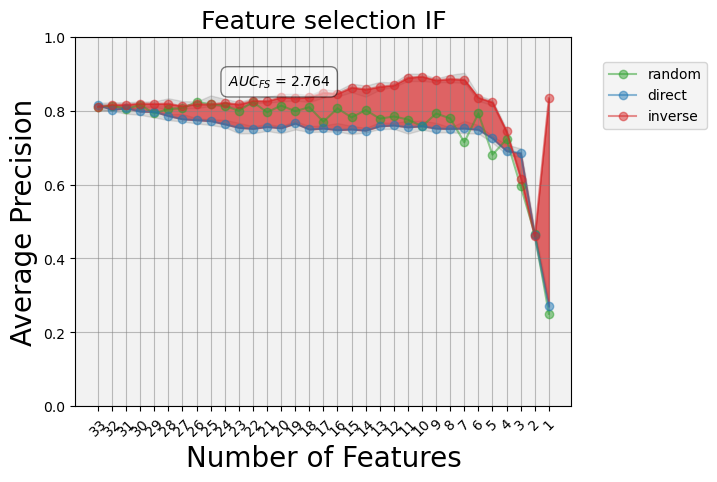

In [19]:
fix_feat_sel_plot(dataset,'IF','DIFFI',1,save=True,plot_image=True,rotation=True)

## Fix `imp_plots`

### TO DO - Replace the `AUC_FS` box for the `feature_selection` plots of `breastw`

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('Xaxis', path = data_syn_path)

In [3]:
def fix_bar_plot(dataset,model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','imp_plots'),save=True,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','global_importances',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    bar_plot(dataset,file_path,plot_path=plot_path,model=model,interpretation=interpretation,scenario=scenario,save_image=save,show_plot=plot_image)

def fix_score_plot(dataset,model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','imp_plots'),save=True,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','global_importances',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    score_plot(dataset,file_path,plot_path=plot_path,model=model,interpretation=interpretation,scenario=scenario,save_image=save,show_plot=plot_image)

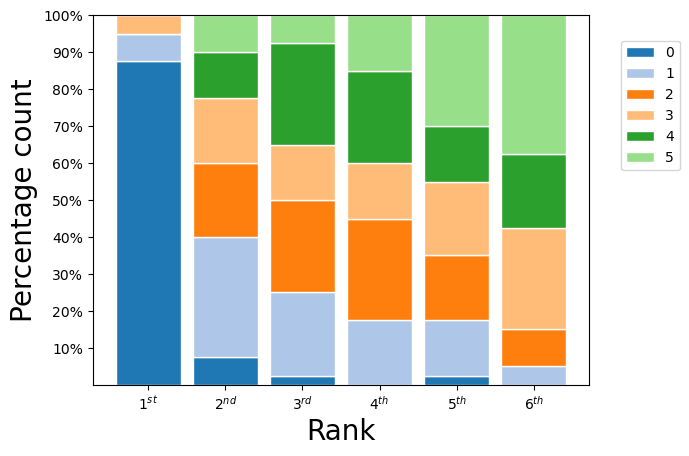

In [4]:
fix_bar_plot(dataset,'EIF+','EXIFFI+',1,save=True)

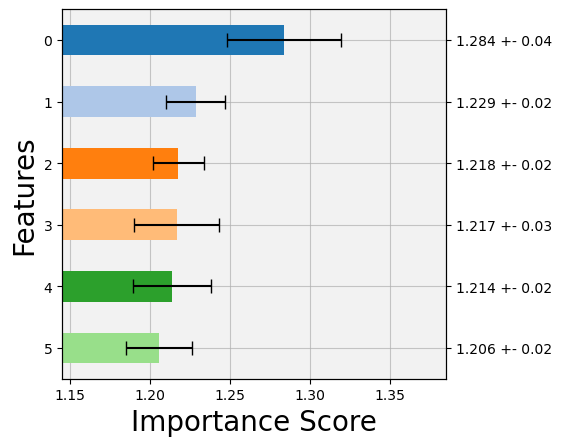

In [5]:
fix_score_plot(dataset,'EIF+','EXIFFI+',1,save=True)

## Fix `AUC_FS` box

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

In [2]:
os.chdir('../experiments/results')
models=['IF']
interpretations=['RandomForest']
scenarios=[2]
dataset_names_syn=['Xaxis','Yaxis','bisect','bisect_3d','bisect_6d']
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
dataset_names_real=['moodify']
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'

Synthetic Datasets

In [3]:
for data in dataset_names_syn:
    dataset = Dataset(data, path = data_syn_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

In [4]:
path=os.path.join(os.getcwd(),dataset.name,'experiments','feature_selection','IF','RandomForest',f'scenario_{str(2)}')
file_path=get_most_recent_file(path)
open_element(file_path)

NewPrecisions(direct=array([[0.09090909, 0.09001009, 0.08827264, 0.09090909, 0.08913119,
        0.09090909, 0.08743305, 0.09090909, 0.08913115, 0.09090909],
       [0.09090909, 0.09090909, 0.08913397, 0.09001024, 0.09001058,
        0.09090909, 0.09001057, 0.09090909, 0.09001062, 0.09090909],
       [0.08913791, 0.09090909, 0.0891356 , 0.09001183, 0.09090909,
        0.09001156, 0.09001152, 0.0900114 , 0.09090909, 0.08745685],
       [0.09001241, 0.09090909, 0.08914174, 0.09090909, 0.0882972 ,
        0.08913957, 0.09090909, 0.0882956 , 0.09090909, 0.09090909],
       [0.09001282, 0.09001263, 0.08914141, 0.09001247, 0.09001277,
        0.08914103, 0.08829603, 0.08914167, 0.08914066, 0.09001266],
       [0.08747248, 0.08441495, 0.08665914, 0.08365088, 0.08914272,
        0.09001379, 0.08050409, 0.08511923, 0.09001285, 0.09001302]]), inverse=array([[0.09001003, 0.08913131, 0.09090909, 0.09090909, 0.09090909,
        0.08827173, 0.09001024, 0.09090909, 0.09090909, 0.09090909],
       [0.

Real Datasets

In [ ]:
for data in dataset_names_real:
    dataset = Dataset(data, path = data_real_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

In [ ]:
dataset=Dataset('bisect_3d',path=data_syn_path)

In [ ]:
aucfs_vals=[]
value_vals=[]
for model in models:
    for interpretation in interpretations:
        if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
            continue
        elif (model=='IF') and (interpretation=='EXIFFI'):
            continue
        else:
            for scenario in scenarios:
                value_vals.append(get_fs_file(dataset,model,interpretation,scenario).value)
                aucfs_vals.append(get_fs_file(dataset,model,interpretation,scenario).aucfs)


`cardio`

In [ ]:
dataset = Dataset('ionosphere', path = data_real_path)

In [ ]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`diabetes` and `shuttle`

In [ ]:
dataset = Dataset('shuttle', path = data_real_path)

In [ ]:
fix_fs_file(dataset,'EIF+','RandomForest',2)
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`moodify`

In [ ]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

## `contamination` plots

In [ ]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

In [ ]:
def fix_contamination_plot(dataset,model,interpretation,scenario,save=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','contamination','precisions')
    file_path=get_most_recent_file(path)
    prec=open_element(file_path)[0]
    path_plots=os.path.join(experiment_path,dataset.name,'plots_new')
    plot_precision_over_contamination(prec,dataset.name,model,interpretation,scenario,path_plots,save_image=save,plot_image=True)

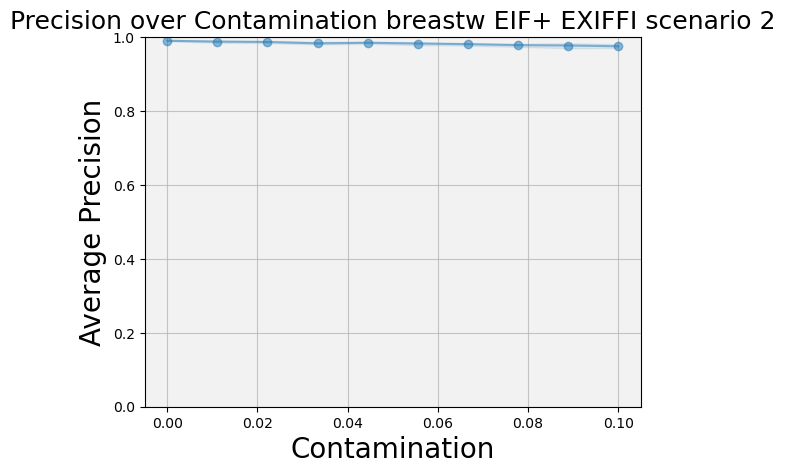

In [ ]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('breastw', path = data_real_path)
fix_contamination_plot(dataset,'EIF+','EXIFFI',2)

In [ ]:
fix_contamination_plot(dataset,'EIF+','EXIFFI',2)

`plot_feature_selection`

In [ ]:
def print_plt_title(dataset_name,model,interpretation,scenario):
    t = time.localtime()
    current_time = time.strftime("%d-%m-%Y_%H-%M-%S", t)
    namefile = "/" + current_time + "_" + dataset_name + "_" + model + "_" + interpretation + "_feature_selection_" + str(scenario) + ".pdf"
    return namefile

In [ ]:
print_plt_title('breastw','EIF+','EXIFFI',2)

'/28-02-2024_10-04-29_breastw_EIF+_EXIFFI_feature_selection_2.pdf'

## Fix `time.pickle` file

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *

In [20]:
os.chdir('../utils_reboot')
with open(os.getcwd() + "/new_time.pickle", "rb") as file:
    dict_time = pickle.load(file)

In [3]:
dict_time.keys()

dict_keys(['fit', 'predict', 'importances'])

In [4]:
dict_time['fit'].keys()

dict_keys(['EIF+', 'IF', 'DIF', 'EIF', 'sklearn_IF'])

In [5]:
dict_time['predict'].keys()

dict_keys(['EIF+', 'IF', 'DIF', 'EIF', 'sklearn_IF'])

In [6]:
dict_time['importances'].keys()

dict_keys(['EXIFFI+', 'EXIFFI', 'DIFFI', 'RandomForest'])

In [11]:
dict_time['fit']['sklearn_IF'].keys()

dict_keys(['wine', 'glass', 'cardio', 'pima', 'breastw', 'annthyroid', 'pendigits', 'diabetes', 'shuttle', 'moodify', 'Xaxis', 'Yaxis', 'bisect', 'bisect_3d', 'bisect_6d'])

In [13]:
dict_time['predict']['sklearn_IF'].keys()

dict_keys(['wine', 'glass', 'cardio', 'pima', 'breastw', 'annthyroid', 'pendigits', 'diabetes', 'shuttle', 'moodify', 'Xaxis', 'Yaxis', 'bisect', 'bisect_3d', 'bisect_6d'])

In [21]:
dict_time['importances']['RandomForest'].keys()

dict_keys(['Xaxis', 'Yaxis', 'bisect', 'bisect_3d', 'bisect_6d', 'wine'])